In [19]:
from PIL import Image
from torchvision import transforms, datasets
from utils.model import CNN
import matplotlib.pyplot as plt
import torch
from torchsummary import summary


### Transformation for each input image

In [20]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

### Get classes names from validation dataset

In [21]:
dataset = datasets.ImageFolder("Animal10/val_dataset", transform=transform)
cls_names = dataset.classes
n_cls = len(cls_names)

In [22]:
print(cls_names)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


### Load image

In [23]:
img_path = "test_images/image3.jpg"

In [24]:
def load_image(img_path):
    img = Image.open(img_path)
    img_data= transform(img)
    img_data = img_data.unsqueeze(0)  #Added batchsize (channel, dim, dim) => (batch_size, channel, dim, dim)
    print(img_data.shape)
    return img_data

### Load the model and the state dictionary

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
model = CNN(n_cls)

In [27]:
def load_model(model, load_path="model_weights.pth", device=device):
    model.load_state_dict(torch.load(load_path))
    model.to(device)
    print(f"Loaded model from {load_path}")

In [28]:
load_model(model)

Loaded model from model_weights.pth


In [29]:
summary(model, input_size=(3,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 256, 256]             448
              ReLU-2         [-1, 16, 256, 256]               0
         MaxPool2d-3         [-1, 16, 128, 128]               0
            Conv2d-4         [-1, 32, 128, 128]           4,640
              ReLU-5         [-1, 32, 128, 128]               0
         MaxPool2d-6           [-1, 32, 64, 64]               0
            Conv2d-7           [-1, 64, 64, 64]          18,496
              ReLU-8           [-1, 64, 64, 64]               0
         MaxPool2d-9           [-1, 64, 32, 32]               0
          Flatten-10                [-1, 65536]               0
           Linear-11                  [-1, 256]      16,777,472
             ReLU-12                  [-1, 256]               0
           Linear-13                   [-1, 10]           2,570
Total params: 16,803,626
Trainable para

### Get prediction of the image

In [30]:
img_data = load_image(img_path)
def get_prediction(model, img_data, device = device):
    model.eval()
    img_data = img_data.to(device)
    output = model(img_data)
    _, predicted = output.max(1)
    return predicted
    

torch.Size([1, 3, 256, 256])


In [31]:
prediction = get_prediction(model, img_data)

In [32]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}


In [33]:
index = prediction.item()
val = translate.get(cls_names[index])
# print("Prediction:", val)

### Display Image with prediction

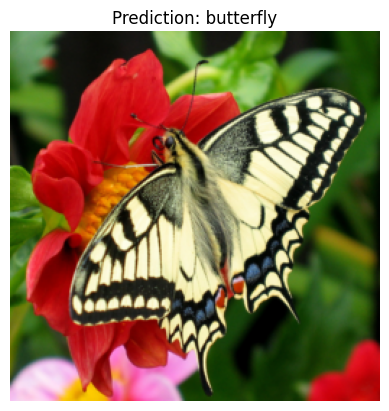

In [34]:
def plot_image(img_data, val):
    plot_img = img_data.squeeze(0)
    # print(plot_img.shape)
    plot_img = plot_img.permute(1,2,0)
    plt.imshow(plot_img)
    plt.title(f"Prediction: {val}")
    plt.axis('off')
    
plot_image(img_data, val)